In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
#Importing the required file
df = pd.read_csv('Soybean Transcriptomics_RNA.samples.csv')

In [3]:
#To know the columns in the dataset
df.columns

Index(['#', 'Name', 'ID for Seq', 'Concentration  ', 'A260/A280', 'A260/A230',
       'Unnamed: 6'],
      dtype='object')

In [4]:
#Top 5 rows in the dataset
df.head()

,#,Name,ID for Seq,Concentration,A260/A280,A260/A230,Unnamed: 6
0,1.0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387,NaN
1,2.0,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390,NaN
2,3.0,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486,NaN
3,4.0,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456,NaN
4,5.0,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357,NaN


In [5]:
#Bottom 5 rows in the dataset
df.tail()

,#,Name,ID for Seq,Concentration,A260/A280,A260/A230,Unnamed: 6
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Describe  function used to find the total count, mean, standard deviation, minimum value, maximum value,
#25,50,75 percentage of the dataset value
df.describe()

,#,Concentration,A260/A280,A260/A230,Unnamed: 6
count,24.000000,24.000000,24.000000,24.000000,0.0
mean,12.500000,294.350000,2.166083,2.210667,NaN
std,7.071068,215.028593,0.059858,0.195358,NaN
min,1.000000,43.900000,2.049000,1.811000,NaN
25%,6.750000,110.125000,2.123750,2.080250,NaN
50%,12.500000,242.850000,2.168000,2.274500,NaN
75%,18.250000,417.200000,2.216500,2.346500,NaN
max,24.000000,781.900000,2.274000,2.486000,NaN


In [7]:
#Check for for nulls
print(df.isnull().sum())

#                  17
Name               17
ID for Seq         17
Concentration      17
A260/A280          17
A260/A230          17
Unnamed: 6         41
dtype: int64


In [8]:
#To see how the data looks like
print(df.shape)
print("\n")
print(df.dtypes)

(41, 7)


#                  float64
Name                object
ID for Seq          object
Concentration      float64
A260/A280          float64
A260/A230          float64
Unnamed: 6         float64
dtype: object


In [9]:
# info gives count and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                24 non-null     float64
 1   Name             24 non-null     object 
 2   ID for Seq       24 non-null     object 
 3   Concentration    24 non-null     float64
 4   A260/A280        24 non-null     float64
 5   A260/A230        24 non-null     float64
 6   Unnamed: 6       0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 2.4+ KB


In [10]:
df

,#,Name,ID for Seq,Concentration,A260/A280,A260/A230,Unnamed: 6
0,1.0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387,NaN
1,2.0,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390,NaN
2,3.0,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486,NaN
3,4.0,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456,NaN
4,5.0,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357,NaN
5,6.0,Control.7dpi.R3,SBAL_6,227.2,2.153,2.141,NaN
6,7.0,Control.7dpi.R4,SBAL_7,358.7,2.196,2.395,NaN
7,8.0,Control.7dpi.R5,SBAL_8,230.4,2.158,2.273,NaN
8,9.0,Control.14dpi.R1.2,SBAL_9,85.1,2.127,2.108,NaN
9,10.0,Control.14dpi.R2.1,SBAL_10,97.0,2.129,2.053,NaN


In [11]:
#Drop columns that are not necessary from the dataset e.g. '#' and Unnamed
test_data = df.drop(['#','Unnamed: 6'],axis=1,inplace=True)

In [12]:
#Drop entire rows with NaN values from the dataset
test_data = df.dropna(how='all')

In [13]:
test_data

,Name,ID for Seq,Concentration,A260/A280,A260/A230
0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387
1,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390
2,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486
3,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456
4,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357
5,Control.7dpi.R3,SBAL_6,227.2,2.153,2.141
6,Control.7dpi.R4,SBAL_7,358.7,2.196,2.395
7,Control.7dpi.R5,SBAL_8,230.4,2.158,2.273
8,Control.14dpi.R1.2,SBAL_9,85.1,2.127,2.108
9,Control.14dpi.R2.1,SBAL_10,97.0,2.129,2.053


In [14]:
#Rename columns...most times the python program misunderstood column names with "/" e.g. 
# rename 'A260/A280'with 'AbsorbanceA260n280.'
renameColumn = test_data.rename(columns={'A260/A280':'AbsorbanceA260n280','A260/A230':'AbsorbanceA260n230'})

In [15]:
renameColumn

,Name,ID for Seq,Concentration,AbsorbanceA260n280,AbsorbanceA260n230
0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387
1,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390
2,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486
3,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456
4,Control.7dpi.R2,SBAL_5,272.3,2.189,2.357
5,Control.7dpi.R3,SBAL_6,227.2,2.153,2.141
6,Control.7dpi.R4,SBAL_7,358.7,2.196,2.395
7,Control.7dpi.R5,SBAL_8,230.4,2.158,2.273
8,Control.14dpi.R1.2,SBAL_9,85.1,2.127,2.108
9,Control.14dpi.R2.1,SBAL_10,97.0,2.129,2.053


In [16]:
renameColumn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                24 non-null     object 
 1   ID for Seq          24 non-null     object 
 2   Concentration       24 non-null     float64
 3   AbsorbanceA260n280  24 non-null     float64
 4   AbsorbanceA260n230  24 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.1+ KB


In [21]:
#To compare the Controls to Alternaria for only day. We...
#Separate the dataset of Day 1 controls and.. 
#Create a subset of Day 1 controls from the original one
options = ['SBAL_1','SBAL_2','SBAL_3','SBAL_4']

In [22]:
controlD1Test = renameColumn[renameColumn['ID for Seq']. isin (options)]

In [23]:
controlD1Test

,Name,ID for Seq,Concentration,AbsorbanceA260n280,AbsorbanceA260n230
0,Control.1dpi.R1,SBAL_1,412.8,2.218,2.387
1,Control.1dpi.R2,SBAL_2,430.4,2.216,2.390
2,Control.1dpi.R3,SBAL_3,781.9,2.274,2.486
3,Control.1dpi.R4,SBAL_4,773.0,2.249,2.456


In [24]:
#Separate the dataset of Day 1 alternarias and... 
#Create a subset of Day 1 alternarias from the original one
options = ['SBAL_13','SBAL_14','SBAL_15','SBAL_16']
alternariaD1Test = renameColumn[renameColumn['ID for Seq']. isin (options)]

In [25]:
alternariaD1Test

,Name,ID for Seq,Concentration,AbsorbanceA260n280,AbsorbanceA260n230
12,Alternaria.1dpi.R1,SBAL_13,544.0,2.232,2.343
13,Alternaria.1dpi.R3,SBAL_14,352.8,2.212,2.272
14,Alternaria.1dpi.R4,SBAL_15,452.4,2.223,2.320
15,Alternaria.1dpi.R5,SBAL_16,565.3,2.228,2.334


In [113]:
x = [544.0,352.8,452.4,565.3]
y = [2.232,2.212,2.223,2.228]
z = [2.2343,2.272,2.320,2.334]

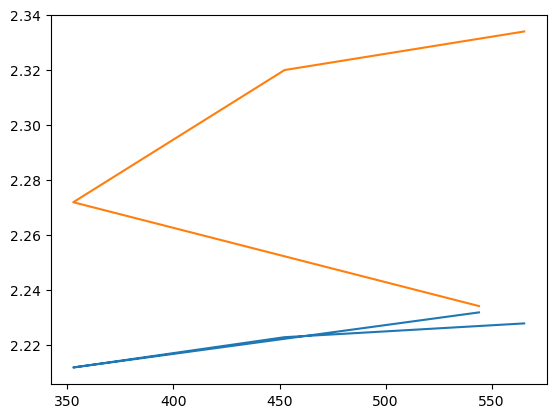

In [114]:
plt.plot(x,y)
plt.plot(x,z)
plt.show()

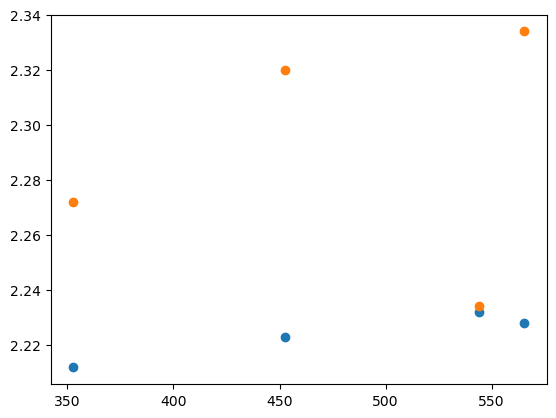

In [115]:
plt.scatter(x,y)
plt.scatter(x,z)
plt.show()

In [ ]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()  